<a href="https://colab.research.google.com/github/Mostafa-Hamidifard/cvx-optimization/blob/main/hw6_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

given data

In [64]:
N = 10
n = 100

q = [ (np.exp(-(i-30)**2 / 100 ) + 2*np.exp(-(i-68)**2 / 100)) for i in range(1,101)]
q = np.array(q)
r = np.array([np.exp(-(i - 50)**2 / 100) for i in range(1,101)])

q = q/sum(q)
r = r/sum(r)

solving morph problem using euclidean morphing

In [65]:
def d_squ(u,v):
    return cvx.norm(u-v,2)**2

T = cvx.Variable((n,N-1))
P = cvx.Variable((n,N)) # each column is a distribution
## constraints
const = []
for i in range(1,N-1):# 1,3,4,...,N-2
    const += [P[:,i:i+1] >= 0]
    const += [(cvx.sum(P[:,i:i+1]) == 1)]
const += [P[:,0] == q]
const += [P[:,N-1] == r]

cost = 0
for i in range(N-1):
    cost += d_squ(P[:,i],P[:,i+1])
objective = cvx.Minimize(cost)
problem = cvx.Problem(objective,const)
problem.solve(solver='ECOS')


0.005327196705954048

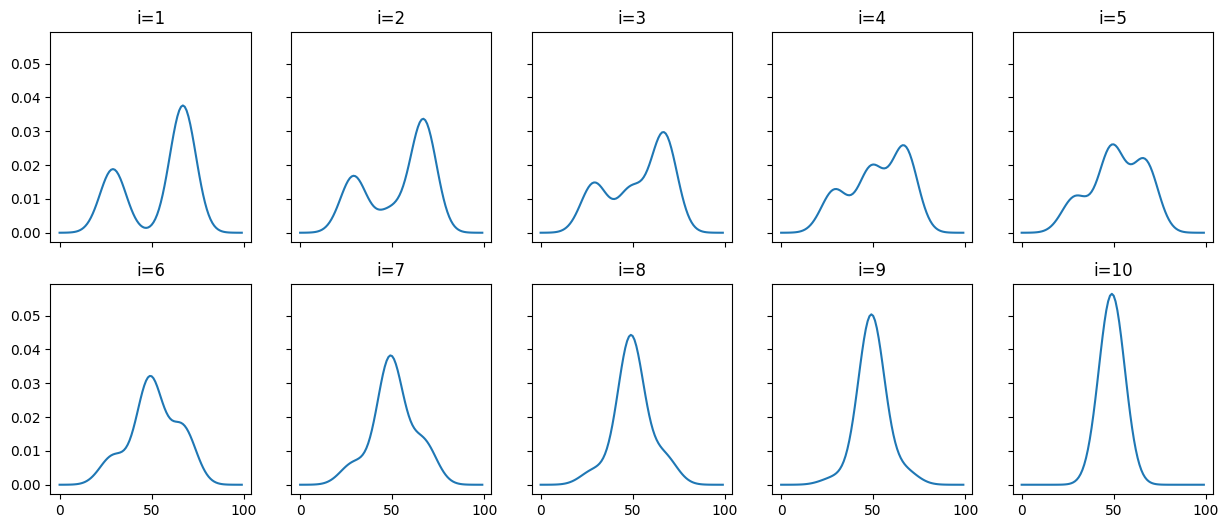

In [66]:
P_opt = P.value
fig , ax = plt.subplots(2,5,figsize=(15,6),sharex=True,sharey=True)
plt.title("Morphing using D-squared")
for i in range(N):
    ax[i//5][i%5].plot(P_opt[:,i])
    ax[i//5][i%5].set_title(f"i={i+1}")


solving morph problem using hellinger